# Seção 3: Predictive Models

### Linear Regression

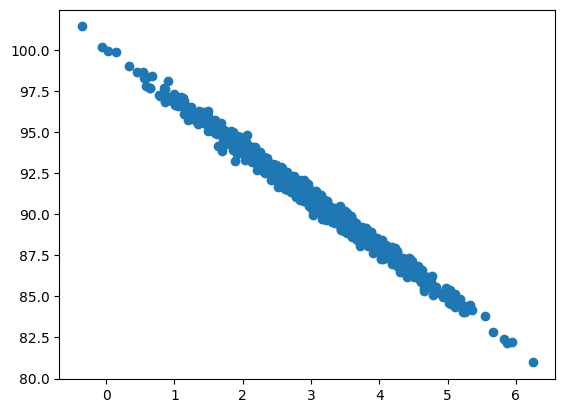

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# gerando dados aleatorios linearmente relacionados 
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = 100 - (pageSpeeds + np.random.normal(0, 0.1, 1000)) * 3

# exibindo o grafico
plt.scatter(pageSpeeds, purchaseAmount)

In [5]:
from scipy import stats
# minimos quadrados e regressão linear 
slope, intercept, r_value, p_value, std_err = stats.linregress(pageSpeeds, purchaseAmount)

In [6]:
r_value ** 2 # calculando r^2

0.9896311278079878

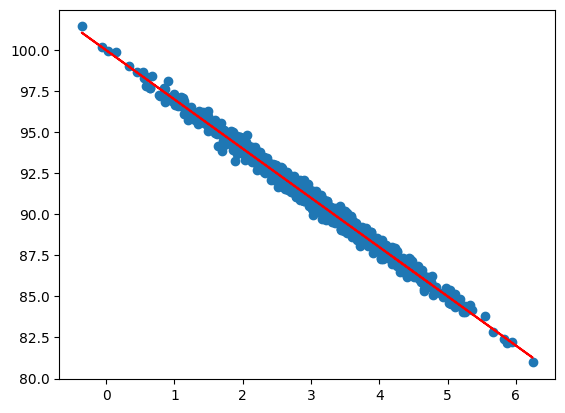

In [7]:
def predict(x):
    return slope * x + intercept

# calculando a linha que melhor se ajuste aos dados usando a função predict 
fitLine = predict(pageSpeeds)

# exibindo o grafico com a linha vermelha 
plt.scatter(pageSpeeds, purchaseAmount)
plt.plot(pageSpeeds, fitLine, c='r')
plt.show()

### Polynomial Regression 

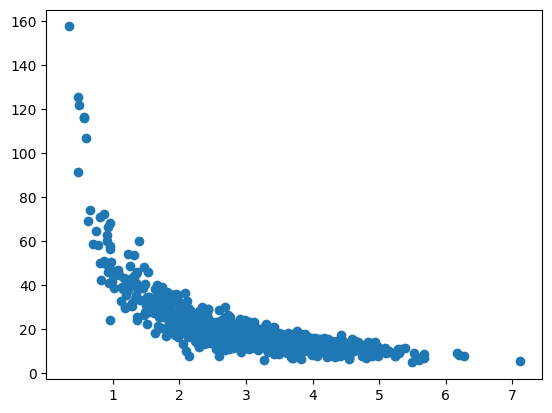

In [8]:
# criando o conjunto de dados
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, 1000)
purchaseAmount = np.random.normal(50.0, 10.0, 1000) / pageSpeeds

# exibindo o grafico
plt.scatter(pageSpeeds, purchaseAmount)

In [9]:
x = np.array(pageSpeeds) # eixo x array de velocidades
y = np.array(purchaseAmount) # eixo y array de valores de compra 

# fazendo a regressão polinomial 
p4 = np.poly1d(np.polyfit(x, y, 4))

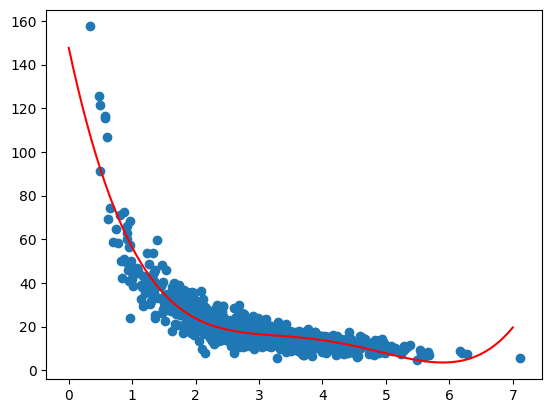

In [10]:
# exibindo o grafico inicial com a linha vermelha calculada
xp = np.linspace(0, 7, 100)
plt.scatter(x, y)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [11]:
from sklearn.metrics import r2_score

# medindo o erro de r^2
r2 = r2_score(y, p4(x))

print(r2)

0.8293766396303073


### Multiple Regression

In [12]:
import pandas as pd 
# criando o conjunto de dados em um data frame 
df = pd.read_excel('http://cdn.sundog-soft.com/Udemy/DataScience/cars.xls')

                     Mileage         Price
Mileage                                   
(0, 10000]       5588.629630  24096.714451
(10000, 20000]  15898.496183  21955.979607
(20000, 30000]  24114.407104  20278.606252
(30000, 40000]  33610.338710  19463.670267


C:\Users\willi\AppData\Local\Temp\ipykernel_3320\1524237304.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean() # peço medio por quilometragem


<Axes: xlabel='Mileage'>

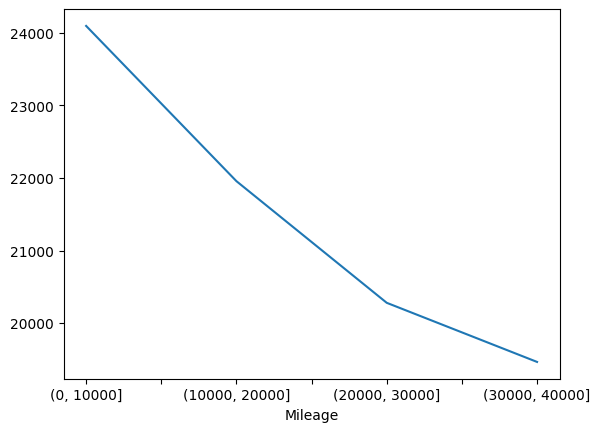

In [13]:
%matplotlib inline

df1 = df[['Mileage','Price']] # extraindo as caracteristicas de quilometragem e preço do data frame original

# verificando se a uma relação entre quilometragem e preço 
bins = np.arange(0,50000,10000) # divide os dados em intervalos de 10k
groups = df1.groupby(pd.cut(df1['Mileage'], bins)).mean() # peço medio por quilometragem 
# exibindo os resultados 
print(groups.head())
groups['Price'].plot.line()

In [14]:
# construindo o modelo 
import statsmodels.api as sm 
from sklearn.preprocessing import StandardScaler

scale = StandardScaler() # criando uma nova instancia 

# extraindo os dados das caracteristicas desejadas
X = df[['Mileage', 'Cylinder', 'Doors']]
y = df['Price']

# fazendo o pré-processamento dos dados
X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)

# adicionando uma coluna constante ao modelo
X = sm.add_constant(X)

print(X)

# OLS regression
est = sm.OLS(y, X).fit()

print(est.summary())

     const   Mileage  Cylinder     Doors
0      1.0 -1.417485   0.52741  0.556279
1      1.0 -1.305902   0.52741  0.556279
2      1.0 -0.810128   0.52741  0.556279
3      1.0 -0.426058   0.52741  0.556279
4      1.0  0.000008   0.52741  0.556279
..     ...       ...       ...       ...
799    1.0 -0.439853   0.52741  0.556279
800    1.0 -0.089966   0.52741  0.556279
801    1.0  0.079605   0.52741  0.556279
802    1.0  0.750446   0.52741  0.556279
803    1.0  1.932565   0.52741  0.556279

[804 rows x 4 columns]
                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.360
Model:                            OLS   Adj. R-squared:                  0.358
Method:                 Least Squares   F-statistic:                     150.0
Date:                Sat, 20 Jul 2024   Prob (F-statistic):           3.95e-77
Time:                        20:12:29   Log-Likelihood:                -8356.7
No. Observ

C:\Users\willi\AppData\Local\Temp\ipykernel_3320\2637548349.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Mileage', 'Cylinder', 'Doors']] = scale.fit_transform(X[['Mileage', 'Cylinder', 'Doors']].values)


In [15]:
y.groupby(df.Doors).mean() # preço medio em relação ao numero de portas

Doors
2    23807.135520
4    20580.670749
Name: Price, dtype: float64

In [16]:
# criando novo carro 
scaled = scale.transform([[45000, 8, 4]])
scaled = np.insert(scaled[0], 0, 1) # adicionando coluna constante novamente 
print(scaled)

# valor de venda previsto 
predicted = est.predict(scaled)
print(predicted)

[1.         3.07256589 1.96971667 0.55627894]
[27658.15707316]


# Seção 4: Machine Learning with Python

### Train / Test

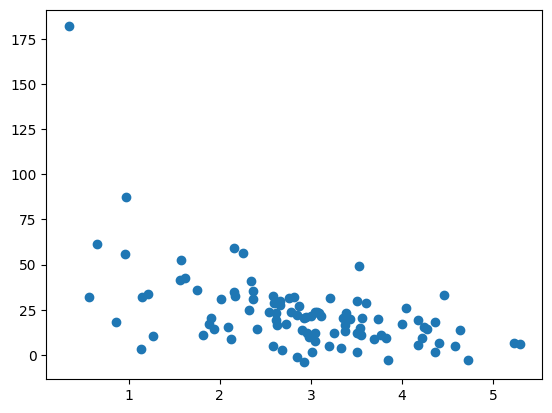

In [17]:
np.random.seed(2)

# criando o conjunto de dados
pageSpeeds = np.random.normal(3.0, 1.0, 100)
purchaseAmount = np.random.normal(50.0, 30.0, 100) / pageSpeeds
# exibindo no grafico 
plt.scatter(pageSpeeds, purchaseAmount)

In [18]:
trainX = pageSpeeds[:80] # 80% para treino
testX = pageSpeeds[80:] # 20% para testes

trainY = purchaseAmount[:80] # 80% para treino
testY = purchaseAmount[80:] # 20% para testes

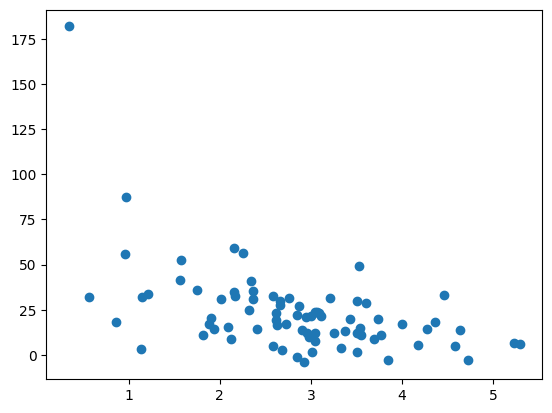

In [19]:
# exibindo no grafico do dataset de treino 
plt.scatter(trainX, trainY)

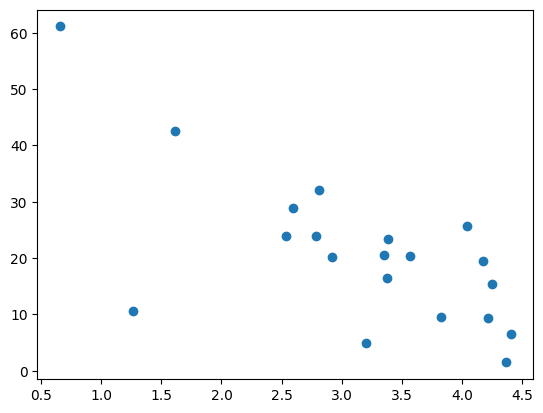

In [20]:
# exibindo no grafico do dataset de teste 
plt.scatter(testX, testY)

In [21]:
x = np.array(trainX)
y = np.array(trainY)
# polinomio de grau 8 
p4 = np.poly1d(np.polyfit(x, y, 8))

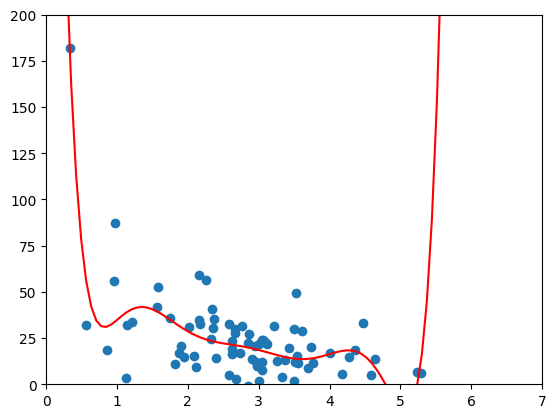

In [22]:
# exibindo o polinomio encontrado em relação ao s dados de treino 
xp = np.linspace(0, 7, 100)
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(x,y)
plt.plot(xp, p4(xp), c='r')
plt.show()

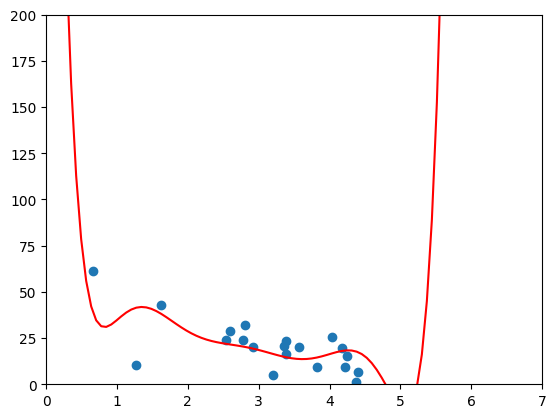

In [23]:
testx = np.array(testX)
testy = np.array(testY)

# exibindo o grafico com os dados de teste 
axes = plt.axes()
axes.set_xlim([0,7])
axes.set_ylim([0,200])
plt.scatter(testx, testy)
plt.plot(xp, p4(xp), c='r')
plt.show()

In [24]:
from sklearn.metrics import r2_score

# medindo o erro de r^2 (teste)
r2 = r2_score(testy, p4(testx))

print(r2)

0.3001816861144364


In [25]:
# medindo o erro de r^2 (treino)
r2 = r2_score(np.array(trainY), p4(np.array(trainX)))

print(r2)

0.6427069514693098


### Naive Bayes

In [26]:
import pandas as pd

In [27]:
import os
import io 
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

# Função para ler os arquivos de um diretório
def readFiles(path):
    for root, dirnames, filenames in os.walk(path):  # Percorre o diretório e seus subdiretórios
        for filename in filenames:
            path = os.path.join(root, filename)
            
            inBody = False
            lines = []
            f = io.open(path, 'r', encoding='latin1')
            for line in f:
                if inBody:
                    lines.append(line)
                elif line == '\n':
                    inBody = True
            f.close()
            message = '\n'.join(lines)
            yield path, message # Retorna o caminho e a mensagem
            
# Função para criar um DataFrame a partir dos arquivos de um diretório           
def dataFrameFromDirectory(path, classification):
    rows = [] # Lista para armazenar as linhas do DataFrame
    index = [] # Lista para armazenar os índices do DataFrame
    for filename, message in readFiles(path):
        rows.append({'message': message, 'class': classification})
        index.append(filename)
        
    return DataFrame(rows, index=index)  # Retorna um DataFrame com as linhas e índices


data = DataFrame({'message': [], 'class': []})

data = pd.concat([data, dataFrameFromDirectory('emails/spam', 'spam')])
data = pd.concat([data, dataFrameFromDirectory('emails/ham', 'ham')])

In [28]:
data.head() # exibindo o data frame

,message,class
emails/spam\00001.7848dde101aa985090474a91ec93fcf0,"<!DOCTYPE HTML PUBLIC ""-//W3C//DTD HTML 4.0 Tr...",spam
emails/spam\00002.d94f1b97e48ed3b553b3508d116e6a09,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
emails/spam\00003.2ee33bc6eacdb11f38d052c44819ba6c,1) Fight The Risk of Cancer!\n\nhttp://www.adc...,spam
emails/spam\00004.eac8de8d759b7e74154f142194282724,##############################################...,spam
emails/spam\00005.57696a39d7d84318ce497886896bf90d,I thought you might like these:\n\n1) Slim Dow...,spam


In [29]:
vectorizer = CountVectorizer()
counts = vectorizer.fit_transform(data['message'].values)

# realizando o Naive Bayes sobre os dados
classifier = MultinomialNB()
targets = data['class'].values
classifier.fit(counts, targets)

MultinomialNB()

In [30]:
# Testando com um exemplo 
examples = ['Free Viagra now!!!', 'Hi Bob, how about a game of golf tomorrow?']
examples_counts = vectorizer.transform(examples) # convertendo as mensagens para o mesmo formato do modelo 
predictions = classifier.predict(examples_counts)
predictions

array(['spam', 'ham'], dtype='<U4')

### K-Means Clustering 

In [31]:
# Função para criar dados de clusters (idade/renda)
from numpy import random
def createClusterData(N, k):
    random.seed(10)
    pointsPerCluster = float(N)/k# Calcula o número de pontos por cluster
    X = []  # Lista para armazenar os pontos gerados
    for i in range(k):
        incomeCentroid = random.uniform(20000.0, 200000.0)
        ageCentroid = random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
    X = np.array(X) # Converte a lista de pontos em um array numpy
    return X

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 0 4 4 4 4 4 0 0 4 4 4]


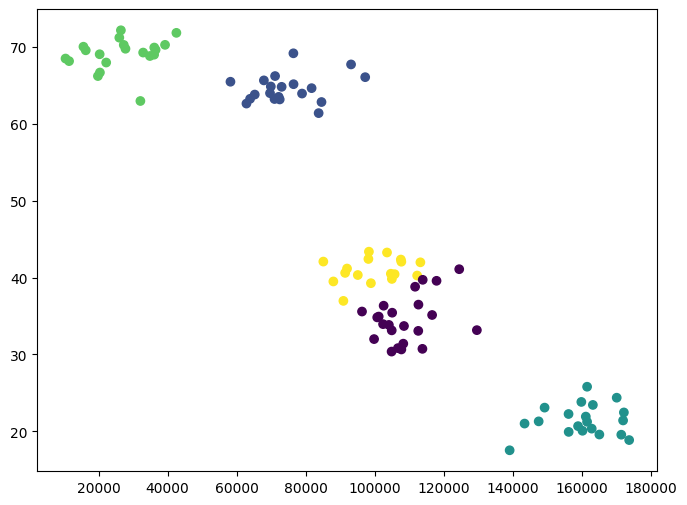

In [32]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import numpy as np 
data = createClusterData(100, 5) # criando o conjunto de dados

model = KMeans(n_clusters=5)

# escalando os dados para normaliza-los
model = model.fit(scale(data))

# exibindo os clusters aos quais cada ponto de dados foi atribuido 
print(model.labels_)

# exibindo o grafico
plt.figure(figsize=(8, 6))
plt.scatter(data[:,0], data[:,1], c=model.labels_.astype(np.float_))
plt.show()

### Decision Trees 

In [33]:
import numpy as np 
import pandas as pd
from sklearn import tree

input_file = 'PastHires.csv' # salavando o caminho do arquivo
df = pd.read_csv(input_file, header=0) # criando o data frame

In [34]:
df.head() # exibindo o data frame

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,Y,4,BS,N,N,Y
1,0,N,0,BS,Y,Y,Y
2,7,N,6,BS,N,N,N
3,2,Y,1,MS,Y,N,Y
4,20,N,2,PhD,Y,N,N


In [35]:
# atribuindo valores numericos para Sim e não
d = {'Y': 1, 'N': 0}
df['Hired'] = df['Hired'].map(d)
df['Employed?'] = df['Employed?'].map(d)
df['Top-tier school'] = df['Top-tier school'].map(d)
df['Interned'] = df['Interned'].map(d)
# definindo pesos numericos para o nivel de formação academica
d = {'BS':0, 'MS': 1, 'PhD': 2}
df['Level of Education'] = df['Level of Education'].map(d)
# exibindo o data frame com os novos valores atribuidos 
df.head()

,Years Experience,Employed?,Previous employers,Level of Education,Top-tier school,Interned,Hired
0,10,1,4,0,0,0,1
1,0,0,0,0,1,1,1
2,7,0,6,0,0,0,0
3,2,1,1,1,1,0,1
4,20,0,2,2,1,0,0


In [36]:
features = list(df.columns[:6]) # salvando as caracteristicas
features

['Years Experience',
 'Employed?',
 'Previous employers',
 'Level of Education',
 'Top-tier school',
 'Interned']

In [37]:
# contruindo a arvore de decisão
y = df['Hired'] # variavel a ser prevista 
X = df[features] # o restante das colunas 

# criando o classificador
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X,y)

In [ ]:
# exibição grafica da arvore de decisão

from IPython.display import Image
from six import StringIO
import pydot
dot_data = StringIO()
tree.export_graphviz(clf, out_file=dot_data, 
                        feature_names=features)

graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [ ]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10)
clf = clf.fit(X, y)

# predict employment of an employed 10-years veteran 
print(clf.predict(np.array([[10, 1, 4, 0, 0, 0]]))) 

# predict employment of an unemployed 10-years veteran 
print(clf.predict(np.array([[10, 0, 4, 0, 0, 0]])))

[1]
[0]


d:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
d:\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


### XGBoost

In [ ]:
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

iris = load_iris() # carregando o pacote 

numSamples, NUmFeatures = iris.data.shape
print(numSamples) # numero de amostras
print(NUmFeatures) # numero de caracteristicas
print(list(iris.target_names)) # possiveis nomes dos alvos 

150
4
['setosa', 'versicolor', 'virginica']


In [39]:
from sklearn.model_selection import train_test_split
# criando as variaveis de treino e teste (sendo 20% de teste)
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=0) 

In [40]:
import xgboost as xgb 
# transformando os dados em DMatrix
train = xgb.DMatrix(X_train, label=y_train)
test = xgb.DMatrix(X_test, label=y_test)

In [41]:
# definindo os valores de hiperparametros 
param = {
    'max_depth': 4,
    'eta': 0.3,
    'objetive': 'multi:softmax',
    'num_class': 3}

# definindo a quantidade de iterações
epochs = 10 

In [42]:
# treinando o modelo 
model = xgb.train(param, train, epochs)

d:\Python\Lib\site-packages\xgboost\core.py:158: UserWarning: [20:25:23] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-06abd128ca6c1688d-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "objetive" } are not used.

  warnings.warn(smsg, UserWarning)


In [43]:
# previsoes com base no modelo 
predictions = model.predict(test)
print(predictions)

[2. 1. 0. 2. 0. 2. 0. 1. 1. 1. 2. 1. 1. 1. 1. 0. 1. 1. 0. 0. 2. 1. 0. 0.
 2. 0. 0. 1. 1. 0.]


In [44]:
# medindo a precisão nos dados de teste
from sklearn.metrics import accuracy_score

accuracy_score(y_test, predictions)

1.0

### Support Vector Machines 

In [48]:
import numpy as np 

# Função para criar dados de clusters (idade/renda)
def createClusterData1(N, k):
    np.random.seed(1234)
    pointsPerCluster1 = float(N)/k
    X = []
    y = []
    for i in range(k):
        incomeCentroid = np.random.uniform(20000.0, 200000.0)
        ageCentroid = np.random.uniform(20.0, 70.0)
        for j in range(int(pointsPerCluster1)):
            X.append([np.random.normal(incomeCentroid, 10000.0), np.random.normal(ageCentroid, 2.0)])
            y.append(i)
    X = np.array(X)
    y = np.array(y)
    return X, y

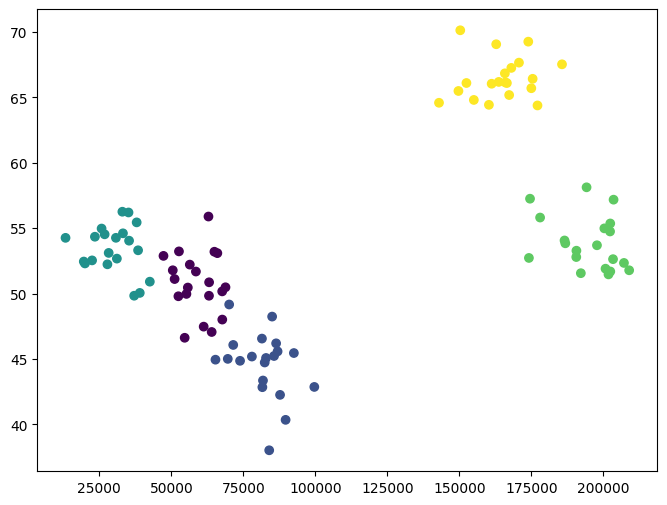

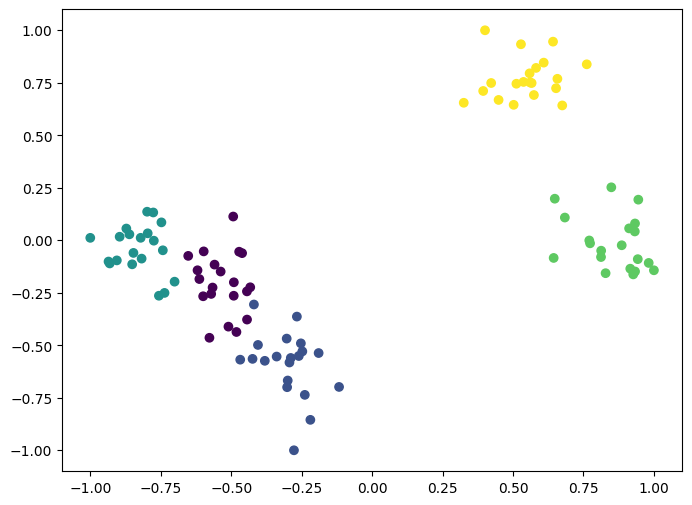

In [49]:
%matplotlib inline 
from pylab import *
from sklearn.preprocessing import MinMaxScaler

(X, y) = createClusterData1(100, 5) # criando o conjunto de dados (100 pontos em 5 grupos)

# exibindo os pontos no grafico
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float_))
plt.show()

scaling = MinMaxScaler(feature_range=(-1, 1)).fit(X) # reduzindo os dados para uma escala de -1 a 1
X = scaling.transform(X)
# exibindo os pontos no garfico apos a redução 
plt.figure(figsize=(8, 6))
plt.scatter(X[:,0], X[:,1], c=y.astype(np.float_))
plt.show()

In [53]:
# aplicando o SVC 
from sklearn import svm, datasets

C = 1.0
svc = svm.SVC(kernel='linear', C=C).fit(X, y)

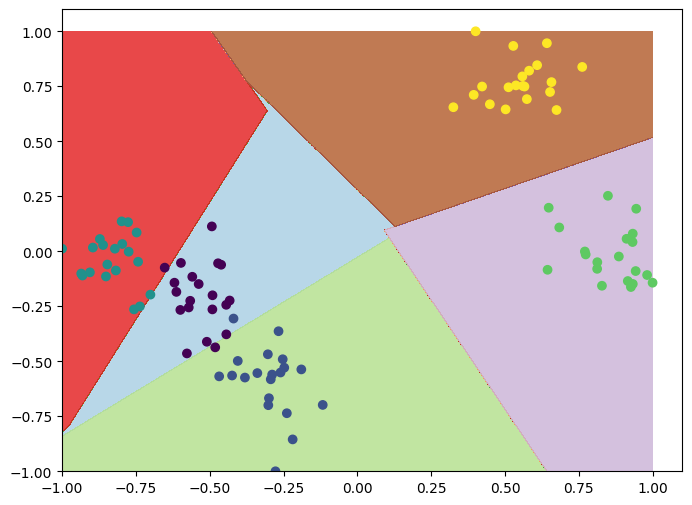

In [57]:
# função para exibir as prediçoes 
def plotPrediction(clf):
    # criando uma grade dos pontos de amostra
    xx, yy = np.meshgrid(np.arange(-1, 1, .001),
                    np.arange(-1, 1, .001))
    
    # tranformando em numpy array 
    npx = xx.ravel()
    npy = yy.ravel()
    
    # tranformando em uma lista 2D (renda e idade)
    samplePoints = np.c_[npx, npy]
    
    # gerar rotulos previstos para cada ponto
    Z = clf.predict(samplePoints)
    
    # exibindo o grafico 
    plt.figure(figsize=(8, 6))
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:,0], X[:,1], c=y.astype(np.float_))
    plt.show()
    
plotPrediction(svc)
    

In [58]:
# fazendo previsões de um novo ponto

print(svc.predict(scaling.transform([[200000, 40]])))

print(svc.predict(scaling.transform([[50000, 65]])))

[3]
[2]
